In [171]:
import pickle
import numpy as np
import pandas as pd
import plotnine as p9
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [172]:
# with open('data/tsne/bert_embed.pickle', 'rb') as f:
#     bert_data = pickle.load(f)
with open('data/tsne/moco_embed.pickle', 'rb') as f:
    moco_data = pickle.load(f)

In [174]:
def plot(data, exclude=[], n_iter=10000, perplexity=50, mean=True):
    all_data = [] # negative_data[:]
    labels = []
    for key, val in data.items():
        if key not in exclude:
            labels.extend([key] * len(val))
            all_data.extend(val)

    tsne = TSNE(n_iter=n_iter, perplexity=perplexity)
    if mean:
        z = [x.mean(0).mean(0) for x in all_data]
    else:
        z = [x.flatten() for x in all_data]
    tsne_results = tsne.fit_transform(z)

    df = pd.DataFrame(tsne_results, columns=['x', 'y'])
    print(len(df), len(labels))
    df['Method Tag'] = labels

    return p9.ggplot(p9.aes('x', 'y'), df) + p9.geom_point(p9.aes(color='Method Tag'), alpha=0.8) + p9.theme_classic()

from tqdm.auto import tqdm
n_iter = 10000
for perplexity in [30, 60, 90, 120]:
    p = plot(moco_data, mean=False, perplexity=perplexity, n_iter=n_iter)
    out_file = f"/work/paras/representjs/data/tsne/transformer_p{perplexity}_n{n_iter}.pdf"
    p.save(out_file)
    p

485 485


/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /work/paras/representjs/data/tsne/transformer_p30_n10000.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


485 485


/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /work/paras/representjs/data/tsne/transformer_p60_n10000.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


485 485


/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /work/paras/representjs/data/tsne/transformer_p90_n10000.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


485 485


/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /work/paras/representjs/data/tsne/transformer_p120_n10000.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


906 906


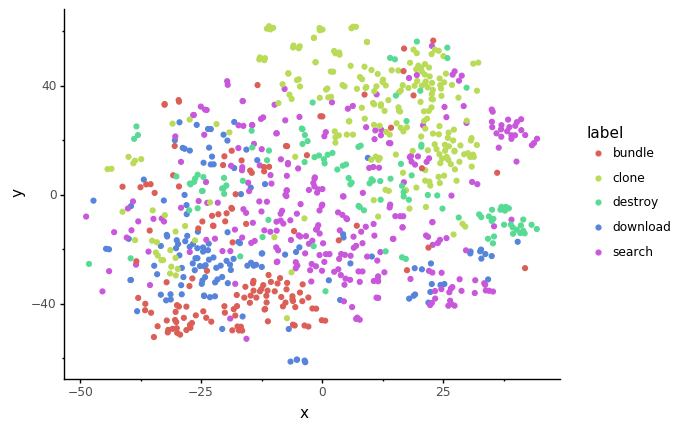

<ggplot: (8751239606917)>

In [146]:
plot(bert_data, ['compute', 'sort', 'compress', 'database'], perplexity=20)

906 906


/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/data/paras/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /work/paras/representjs/data/tsne/p60_n1000.pdf
  warn('Filename: {}'.format(filename), PlotnineWarning)


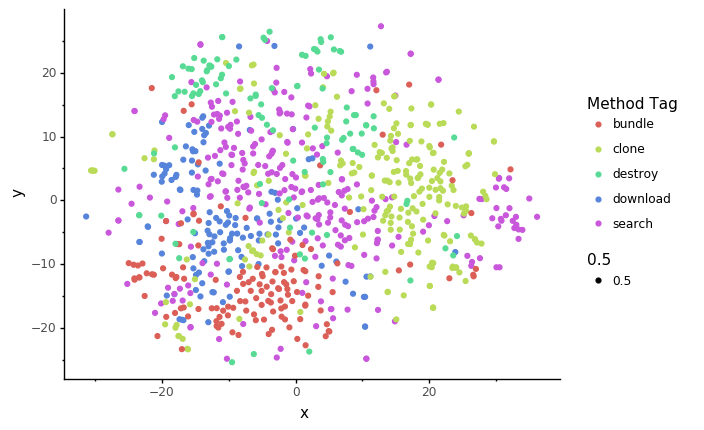

<ggplot: (8751239445561)>

906 906


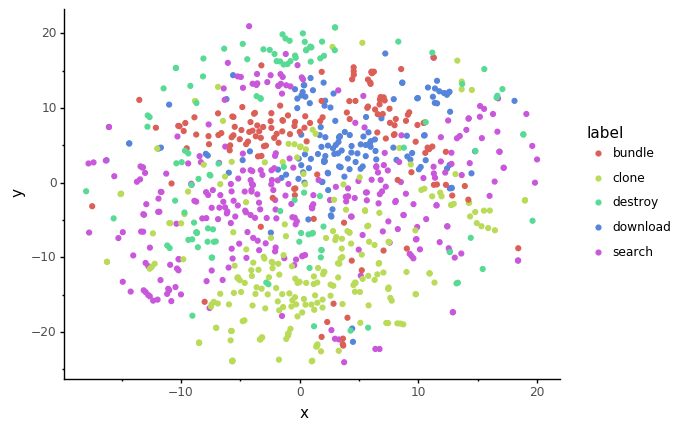

<ggplot: (8751549949461)>

In [147]:
plot(moco_data, ['compute', 'sort', 'compress', 'database'], mean=False, perplexity=90)